## 9. 독립동일분포
### - 독립성
### - 합의 분포
### - 표본평균의 분포

* 서로 독립인 다차원 확률변수 -> 독립동일분포 (Independently and Identically Distributed, i.i.d)
* 독립동일분포를 다루는 이유 -> 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있기 때문

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
# 이산형 확률변수를 다룰 때 사용한 함수 준비
linestyles = ['-','--',':','-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x,y: x)
    mean_Y = E(XY, lambda x,y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

#### 1. 독립성 (Independence)
* 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
* $f_{X,Y}(x,y) = f_X(x)f_Y(y)$ -> 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있음
* 즉, n개의 확률변수 $X_1,X_2,\dots,X_n$이 다음을 만족할 때, $X_1,X_2,\dots,X_n$은 서로 독립\
$f_{X_1,X_2,\dots,X_n}(x_1,x_2,\dots,x_n) = f_{X_1}(x_1)f_{X_2}(x_2)\dots f_{X_n}(x_n)$\
(다만 함수 $f$가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄)
* 그러면 '독립성'과 '무상관성'의 차이는?
  - 독립성이 더 강한 개념
  - 독립성을 만족하면 무상관이 됨 / 무상관이어도 서로 영향을 끼치는 경우가 있으므로 독립성을 가진다고 말할 수 없음

In [3]:
# 예시) 불공정한 주사위
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [4]:
# 공분산 확인
Cov(XY)

-8.326672684688674e-17

In [5]:
# 무상관이지만 독립은 아닌 경우
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

0.0

In [7]:
# 독립성의 정의를 활용하여 위의 경우가 독립인지 확인
f_X(0) * f_Y(0), f_XY(0,0) # 등식이 성립하지 않으므로 독립X

(0.1111111111111111, 0.333)

#### 2. 합의 분포
* 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,\dots,X_n$의 합이 따르는 확률분포를 의미함
* 확률변수 합의 기댓값:\
확률변수 $X_1,X_2,\dots,X_n$에 관해서\
$E(X_1 + X_2 + \dots + X_n) = E(X_1) + E(X_2) + \dots + E(X_n)$ 이 성립
* 확률변수 합의 공식:\
확률변수 $X_1,X_2,\dots,X_n$이 서로 독립이라면\
$V(X_1 + X_2 + \dots + X_n) = V(X_1) + V(X_2) + \dots + V(X_n)$ 이 성립
  - $X_1,X_2,\dots,X_n$이 서로 독립이라면 무상관이므로 공분산 항은 모두 0이 되기 때문
* 정규분포의 경우 정규분포의 합도 정규분포가 되는 성질이 있음
  - 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서, 그 합도 동일한 확률분포가 되는 성질 = 재생성(reproductive property)
* n개의 정규분포의 합의 분포:\
서로 독립인 확률변수 $X_1 \sim N(\mu_1,\sigma_1^2), X_2 \sim N(\mu_2,\sigma_2^2), \dots, X_n \sim N(\mu_n,\sigma_n^2)$에 관하여\
$\sum_{i=1}^n{X_i} \sim N(\sum_{i=1}^n{\mu_i}, \sum_{i=1}^n{\sigma_i^2})$d이 성립
* 포아송 분포의 합의 분포:\
서로 독립인 확률변수 $X_1 \sim Poi(\lambda_1), X_2 \sim Poi(\lambda_2), \dots, X_n \sim Poi(\lambda_n)$에 관하여\
$\sum_{i=1}^n{X_i} \sim Poi(\sum_{i=1}^n{\lambda_i})$d이 성립
* 베르누이 분포의 합의 분포
  - 재생성이 없음
  - 베르누이 분포의 합은 이항분포가 됨
  - 이 때 파라미터는 그대로 n, p가 됨
  - 즉 $X_1,X_2,\dots,X_10 \sim^{iid} Bern(0.3)$ 일 떄 $\sum_{i=1}^{10}{X_i}$에서\
  $Bern(p)$의 기댓값은 p, 분산은 p(1-p)이므로 $\sum_{i=1}^{10}{X_i}$의 기댓값은 $10*0.3=3$, 분산은 $10*0.3*(1-0.3)=2.1$\
  그리고 베르누이 분포의 합은 $\sum_{i=1}^{10}{X_i} \sim Bin(10,0.3)$이 됨
  - 정리하자면...\
  $X_1,X_2,\dots,X_n \sim^{iid} Bern(p)$에 관하여\
  $\sum_{i=1}^{n}{X_i} \sim Bin(n,p)$가 성립
  

In [8]:
# 정규분포의 합의 분포
# 표본데이터의 평균과 분산은 표본 크기가 충분하다면 X+Y의 기댓값 및 분산과 일치할 것
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

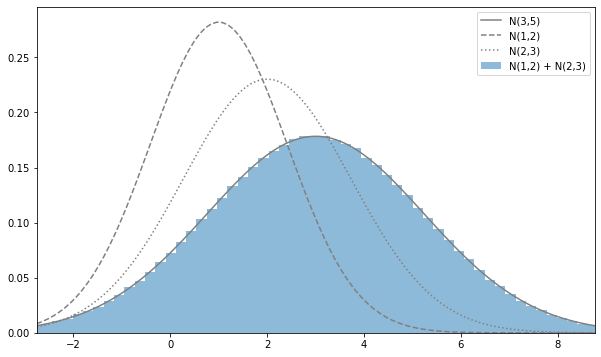

In [9]:
# X+Y로부터 무작위추출한 표본 데이터의 히스토그램 및 N(3,5)의 밀도함수 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True, alpha=0.5, label='N(1,2) + N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

In [10]:
# 포아송 분포의 합의 분포
# 포아송 분포도 재생성을 지닌 확률분포임
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999034, 6.989995066843997)

<ipython-input-11-849685b4a84b>:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)


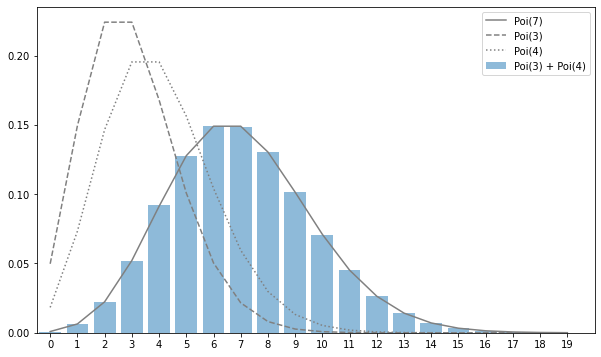

In [11]:
# X+Y로부터 무작위추출한 표본 데이터의 히스토그램 및 Poi(7)의 확률함수 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

In [12]:
# 베르누이 분포의 합의 분포
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

<ipython-input-13-6779bc586ec5>:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)


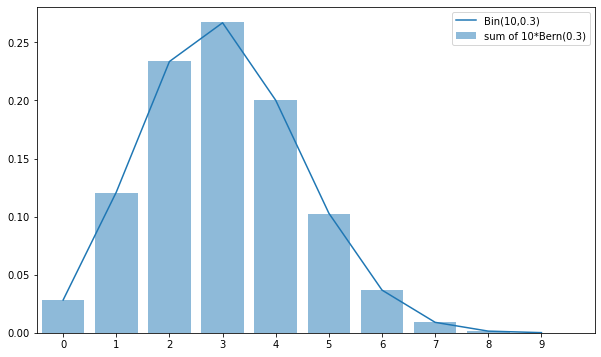

In [13]:
# 히스토그램 및 Bern(10,0.3)의 확률함수 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10,0.3)')
ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show()

#### 3. 표본평균의 분포
* 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,\dots,X_n$의 표본평균\
$\bar{X} = {{X_1+X_2+\dots +X_n}\over n}$이 따르는 분포
* 모평균의 구간추정이나 모평균의 검정에서 활용
* 표본평균의 기댓값:\
$E(\bar{X}) = E({{X_1+X_2+\dots +X_n}\over n}) = {E(X_1)+E(X_2)+\dots+E(X_n) \over n}\
= {n\mu \over n} = {\mu}$
* 표본평균의 분산:\
$V(\bar{X}) = V({{X_1+X_2+\dots +X_n}\over n}) = {V(X_1)+V(X_2)+\dots+V(X_n) \over n}\
= {{n\sigma^2}\over {n^2}} = {\sigma^2 \over n}$
* 정규분포의 표본평균의 분포:\
$X_1,X_2,\dots,X_n \sim^{iid} N(\mu,\sigma^2)$일 때\
$\bar{X} \sim N(\mu,{\sigma^2 \over n})$이 성립
* 포아송 분포의 표본평균 분포
  - 재생성이 있는 포아송 분포에서도 표본평균에 대해서는 포아송 분포를 유지 X
* 중심극한정리
  - 포아송 분포와 같이 재생성이 있는 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 없음
  - "표본평균의 분포에 관한 매우 강력하고 아름다운 정리" = 중심극한정리(Central Limit Theorem)
  - 확률변수 $X_1,X_2,\dots,X_n$이 서로 독립이고, 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포 $F$를 따를 때,\
  $n$이 커짐에 따라 표본평균 $\bar{X}$의 분포는 정규분포 $N(\mu,{\sigma^2 \over n}$에 가까워짐
  - 즉, 원래 분포가 뭐였든 간에, 표본평균의 분포는 정규분포에 가까워진다는 것
* 대수의 법칙 (Law of Large Numbers)
  - 확률변수 $X_1,X_2,\dots,X_n$이 서로 독립이고, 평균이 $\mu$, 분산이 $\sigma^2$일 것 같은 확률분포를 따를 때,\
  $n$이 커짐에 따라 표본평균은 $\mu$에 수렴한다

In [14]:
# n=10, X_1,...,X_10 ~ iid N(1,2)의 표본평균을 구해봄
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9995466511402974, 0.19942119653587653)

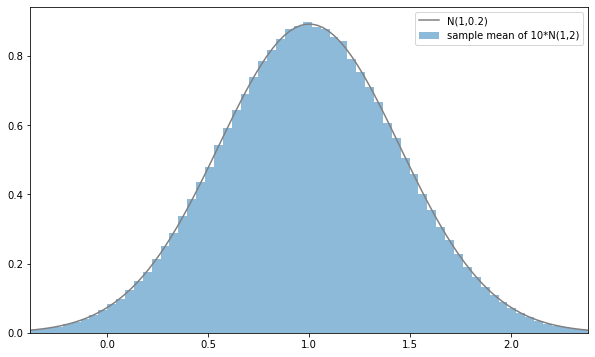

In [15]:
# 히스토그램과 밀도함수 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*N(1,2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1,0.2)',color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

In [16]:
# 포아송 분포의 표본평균 분포
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9991454, 0.30001874965884007)

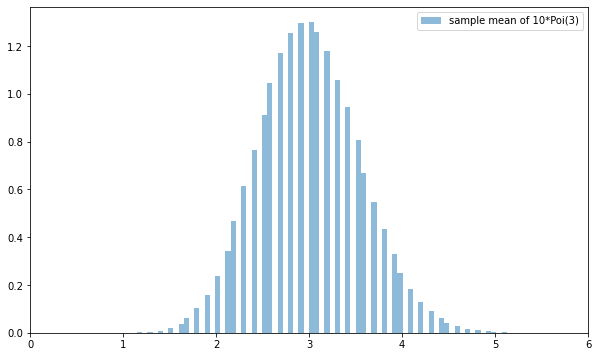

In [17]:
# 히스토그램으로 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0,6)
plt.show()

In [18]:
# 표본평균의 계산을 10000번 수행
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

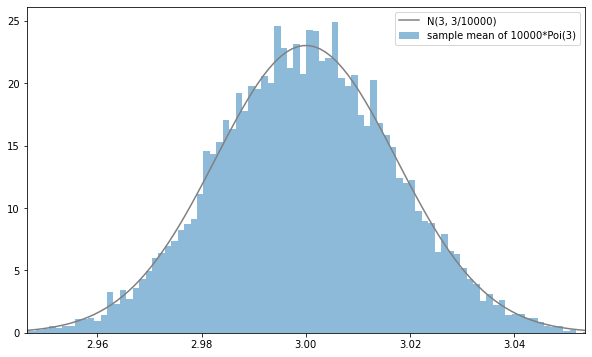

In [19]:
# 히스토그램과 밀도함수 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

In [20]:
# 대수의 법칙 확인
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T

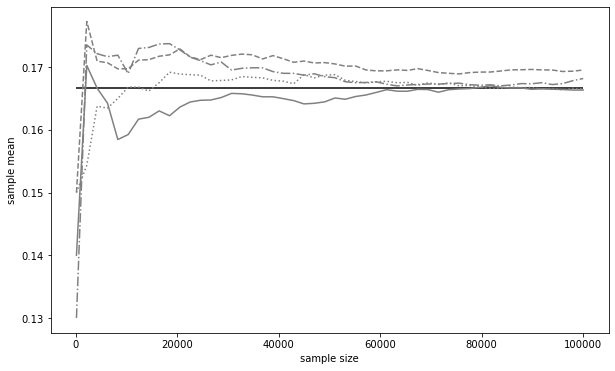

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()